HOG

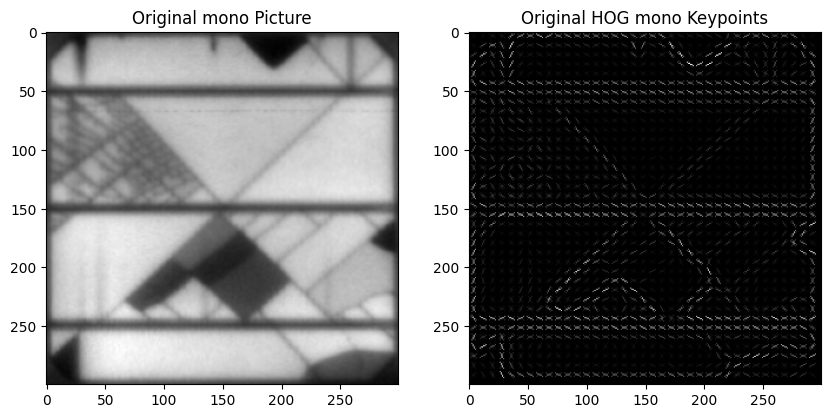

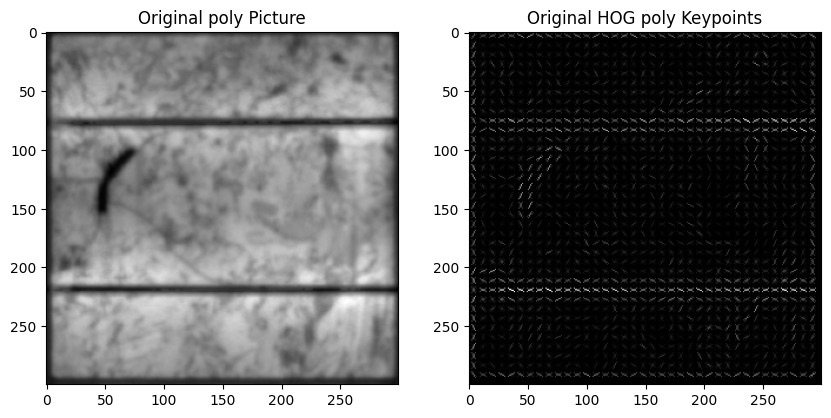

In [1]:
from skimage.feature import hog
import matplotlib.pyplot as plt
import cv2
picture = "cell0030.png"
# for img_name in image_names:
img = cv2.imread(picture, cv2.IMREAD_GRAYSCALE)
    # show(img, img_name)
adjusted_i = cv2.convertScaleAbs(img, alpha=1, beta=10)

fd, hog_image = hog(adjusted_i, orientations=4, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, feature_vector=True)
picture1 = "cell0077.png"
# for img_name in image_names:
img1 = cv2.imread(picture1, cv2.IMREAD_GRAYSCALE)
    # show(img, img_name)
adjusted_i1 = cv2.convertScaleAbs(img1, alpha=1, beta=10)

fd1, hog_image1 = hog(adjusted_i1, orientations=4, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, feature_vector=True)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original mono Picture")
# plt.show()

plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title("Original HOG mono Keypoints")
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title("Original poly Picture")
# plt.show()

plt.subplot(1, 2, 2)
plt.imshow(hog_image1, cmap='gray')
plt.title("Original HOG poly Keypoints")
plt.show()


SIFT

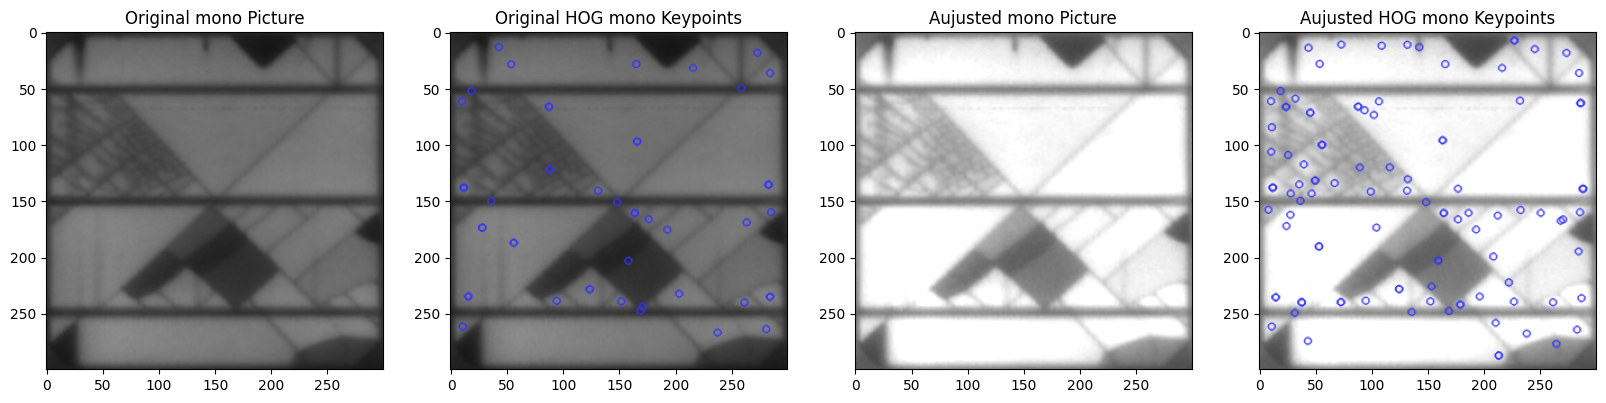

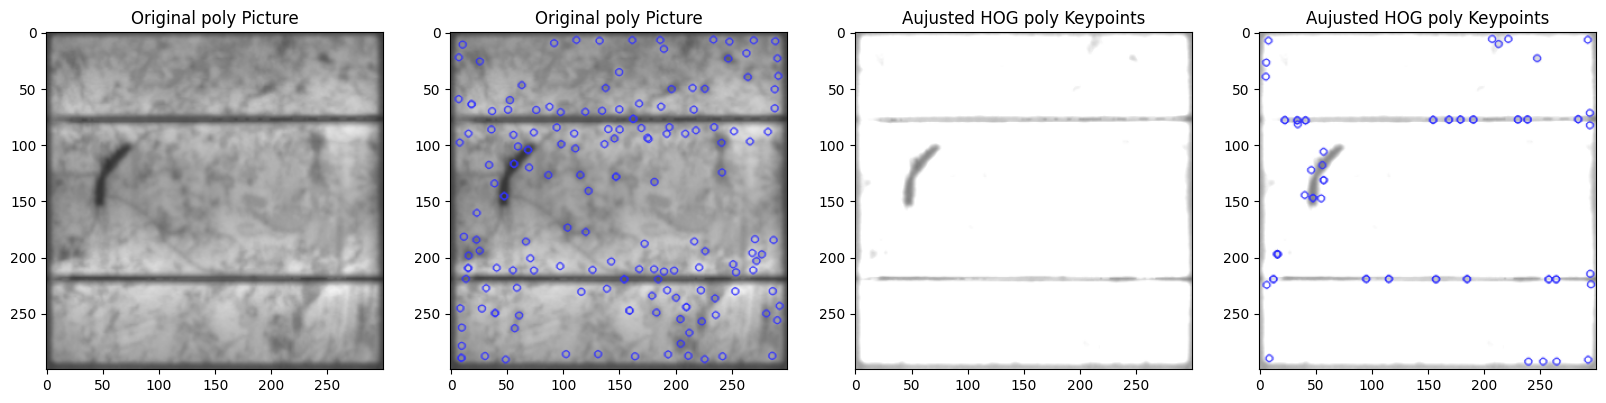

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
picture = cv2.imread("cell0030.png")
adjusted = cv2.convertScaleAbs(picture, alpha=2, beta=25)
if picture is None:
    print("Error loading Picture!")
    exit()
    
sif_class =cv2.SIFT_create()
keypts = sif_class.detect(picture,None)
keypts_l, keypts_d = sif_class.detectAndCompute(picture,None)
pic_include_kp = cv2.drawKeypoints(picture,keypts_l,None,color=(50,50,255))

# b) 
# Reduce the number of key points by adjusting the features parameter
default_keypoints_count = len(keypts)
reduced_keypoints_count = int(0.1 * default_keypoints_count)

sift_reduced = cv2.SIFT_create(nfeatures=reduced_keypoints_count)
keypoints_reduced = sift_reduced.detect(picture, None)

sif1_class =cv2.SIFT_create()
keypts = sif1_class.detect(adjusted,None)
keypts_2, keypts_d = sif1_class.detectAndCompute(adjusted,None)
pic_include_kp2 = cv2.drawKeypoints(adjusted,keypts_2,None,color=(50,50,255))

plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(picture, cmap='gray')
plt.title("Original mono Picture")
# plt.show()

plt.subplot(1, 4, 2)
plt.imshow(pic_include_kp)
plt.title("Original HOG mono Keypoints")

plt.subplot(1, 4, 3)
plt.imshow(adjusted)
plt.title("Aujusted mono Picture")

plt.subplot(1, 4, 4)
plt.imshow(pic_include_kp2)
plt.title("Aujusted HOG mono Keypoints")
plt.show()

picture = cv2.imread("cell0077.png")
adjusted = cv2.convertScaleAbs(picture, alpha=2, beta=25)
if picture is None:
    print("Error loading Picture!")
    exit()
    
sif_class =cv2.SIFT_create()
keypts = sif_class.detect(picture,None)
keypts_l, keypts_d = sif_class.detectAndCompute(picture,None)
pic_include_kp = cv2.drawKeypoints(picture,keypts_l,None,color=(50,50,255))

# b) 
# Reduce the number of key points by adjusting the features parameter
default_keypoints_count = len(keypts)
reduced_keypoints_count = int(0.1 * default_keypoints_count)

sift_reduced = cv2.SIFT_create(nfeatures=reduced_keypoints_count)
keypoints_reduced = sift_reduced.detect(picture, None)

sif1_class =cv2.SIFT_create()
keypts = sif1_class.detect(adjusted,None)
keypts_2, keypts_d = sif1_class.detectAndCompute(adjusted,None)
pic_include_kp2 = cv2.drawKeypoints(adjusted,keypts_2,None,color=(50,50,255))

plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(picture, cmap='gray')
plt.title("Original poly Picture")
# plt.show()

plt.subplot(1, 4, 2)
plt.imshow(pic_include_kp)
plt.title("Original poly Picture")

plt.subplot(1, 4, 3)
plt.imshow(adjusted)
plt.title("Aujusted HOG poly Keypoints")

plt.subplot(1, 4, 4)
plt.imshow(pic_include_kp2)
plt.title("Aujusted HOG poly Keypoints")
plt.show()

OTSU

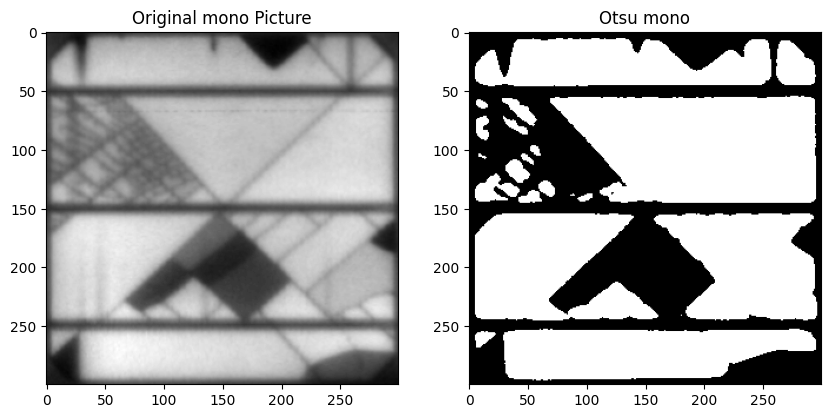

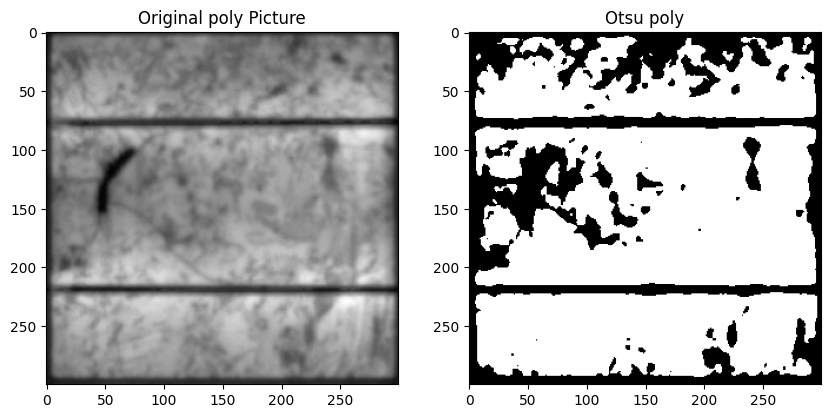

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_features(image):
    # Apply Otsu thresholding
    otsu_threshold = otsu(image)

    # Binaryize the image
    _, binary_image = cv2.threshold(image, otsu_threshold, 255, cv2.THRESH_BINARY)

    return binary_image

def otsu(image):
    hist, _ = np.histogram(image.ravel(), 256, [0,256])
    total = image.size
    current_max, threshold = 0, 0
    total_sum = np.sum(np.arange(256) * hist)
    bg_sum, fg_sum, bg_weight, fg_weight = 0, 0, 0, 0
    for i in range(256):
        bg_weight += hist[i]
        fg_weight = total - bg_weight
        if bg_weight == 0 or fg_weight == 0:
            continue
        bg_sum += i * hist[i]
        fg_sum = total_sum - bg_sum
        bg_mean = bg_sum / bg_weight
        fg_mean = fg_sum / fg_weight
        # Calculate between class variance
        var_between = bg_weight * fg_weight * (bg_mean - fg_mean) ** 2
        # Check if new maximum found
        if var_between > current_max:
            current_max = var_between
            threshold = i
    return threshold

def threshold_image(image, threshold):
    output = np.zeros_like(image)
    output[image > threshold] = 255
    return output

picture = "cell0030.png"
image = cv2.imread(picture, cv2.IMREAD_GRAYSCALE)
otsu_thresh = otsu(image)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image,cmap='gray')
plt.title("Original mono Picture")
# plt.show()

plt.subplot(1, 2, 2)
plt.imshow(threshold_image(image, otsu_thresh), cmap='gray')
plt.title('Otsu mono')
plt.show()

picture1 = "cell0077.png"
image1 = cv2.imread(picture1, cv2.IMREAD_GRAYSCALE)
otsu_thresh1 = otsu(image1)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image1,cmap='gray')
plt.title("Original poly Picture")
# plt.show()

plt.subplot(1, 2, 2)
plt.imshow(threshold_image(image1, otsu_thresh1), cmap='gray')
plt.title('Otsu poly')
plt.show()